<a href="https://colab.research.google.com/github/1118121365/project-AI-ML-position/blob/main/project_AL_ML_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

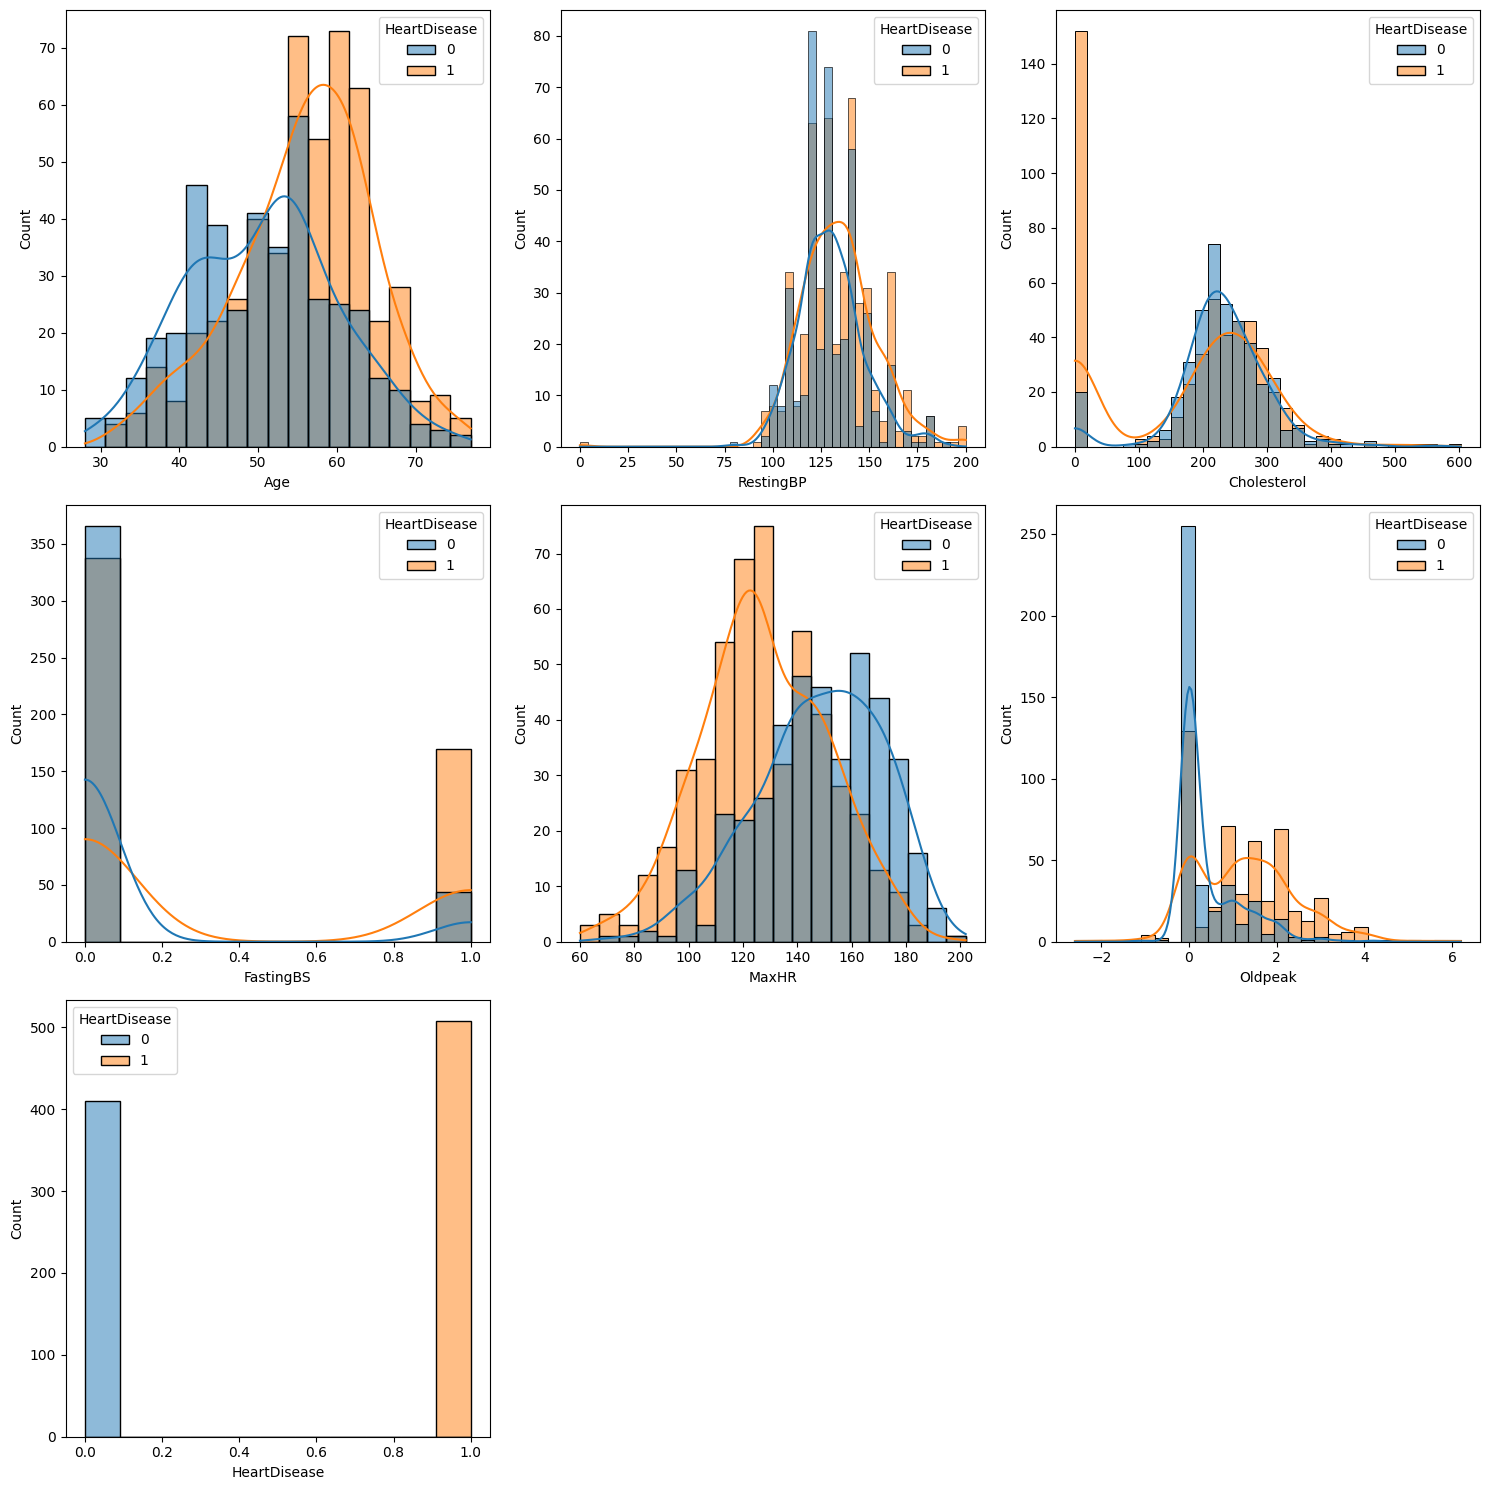

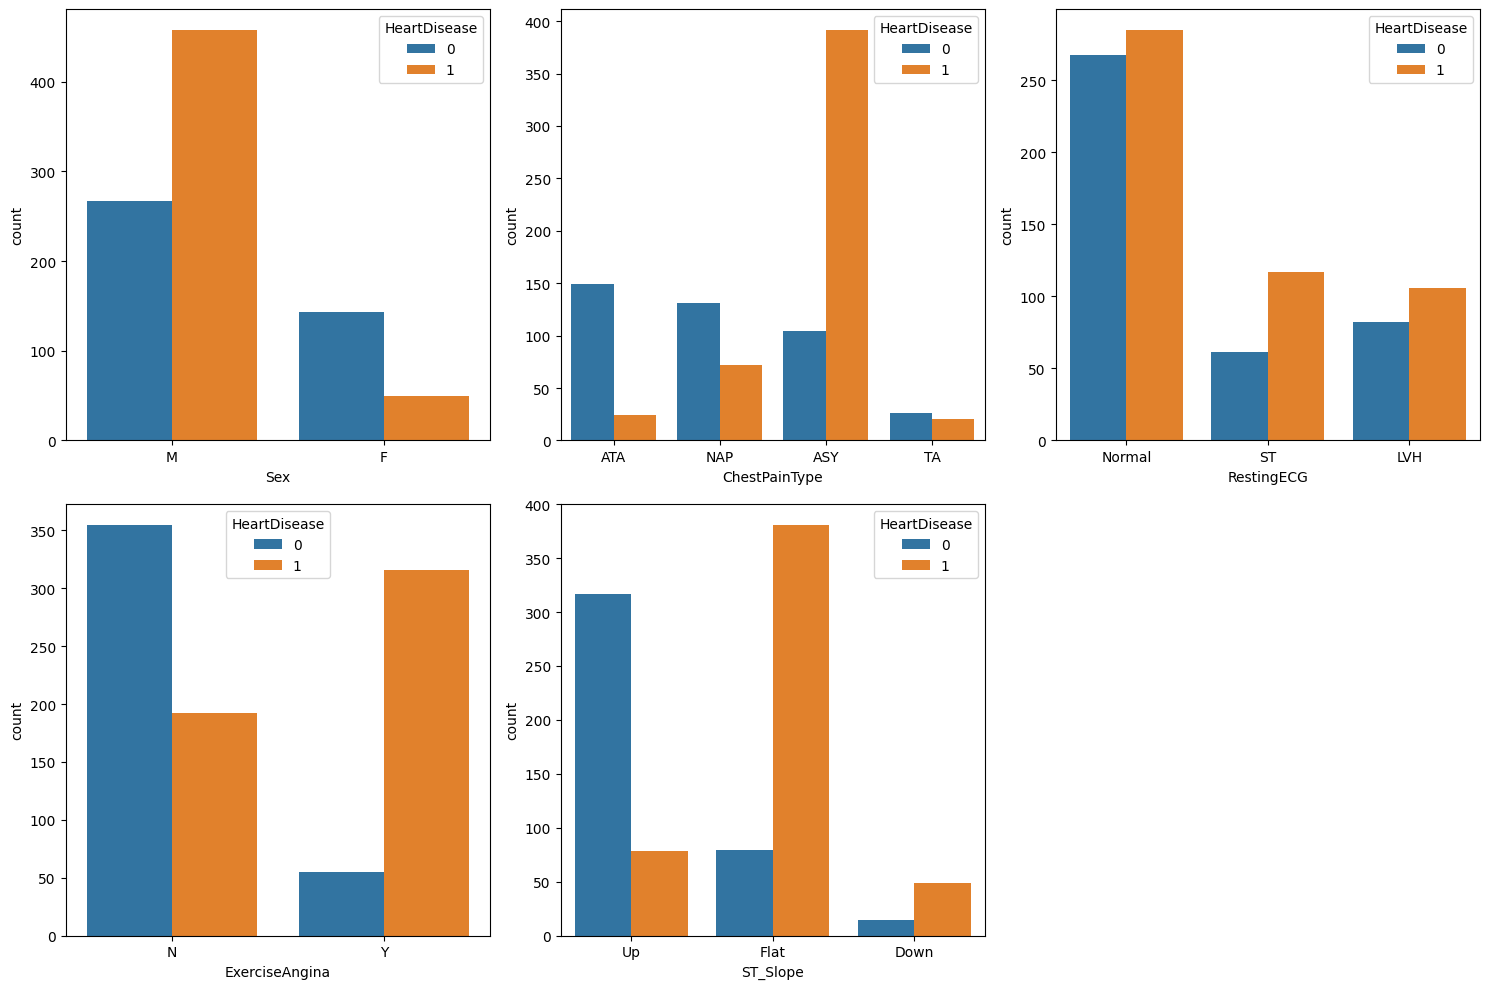

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/heart.csv')

# Explore basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualize distributions - corrected version
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
n_numerical = len(numerical_cols)

# Calculate appropriate grid size
ncols = 3
nrows = (n_numerical + ncols - 1) // ncols  # Round up division

plt.figure(figsize=(15, 5*nrows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(data=df, x=col, hue='HeartDisease', kde=True)
plt.tight_layout()
plt.show()

# Visualize categorical features - corrected version
categorical_cols = df.select_dtypes(include='object').columns
n_categorical = len(categorical_cols)

ncols = min(3, n_categorical)  # Maximum 3 columns
nrows = (n_categorical + ncols - 1) // ncols  # Round up division

plt.figure(figsize=(5*ncols, 5*nrows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(data=df, x=col, hue='HeartDisease')
plt.tight_layout()
plt.show()

In [ ]:
#Feature Engineering

In [21]:
# Define numerical and categorical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Model Building

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, average_precision_score

# Dictionary of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1]

    # Store results
    results[name] = {
        'model': pipeline,
        'accuracy': pipeline.score(X_test, y_test),
        'classification_report': classification_report(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'pr_auc': average_precision_score(y_test, y_proba),
        'y_proba': y_proba
    }

    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {results[name]['accuracy']:.3f}")
    print(f"ROC AUC: {results[name]['roc_auc']:.3f}")
    print(f"PR AUC: {results[name]['pr_auc']:.3f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.897
ROC AUC: 0.930
PR AUC: 0.937
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        82
           1       0.89      0.93      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184


Random Forest Results:
Accuracy: 0.902
ROC AUC: 0.937
PR AUC: 0.938
              precision    recall  f1-score   support

           0       0.92      0.85      0.89        82
           1       0.89      0.94      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184


Gradient Boosting Results:
Accuracy: 0.891
ROC AUC: 0.930
PR AUC: 0.933
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0

In [ ]:
#Model Evaluation and Selection

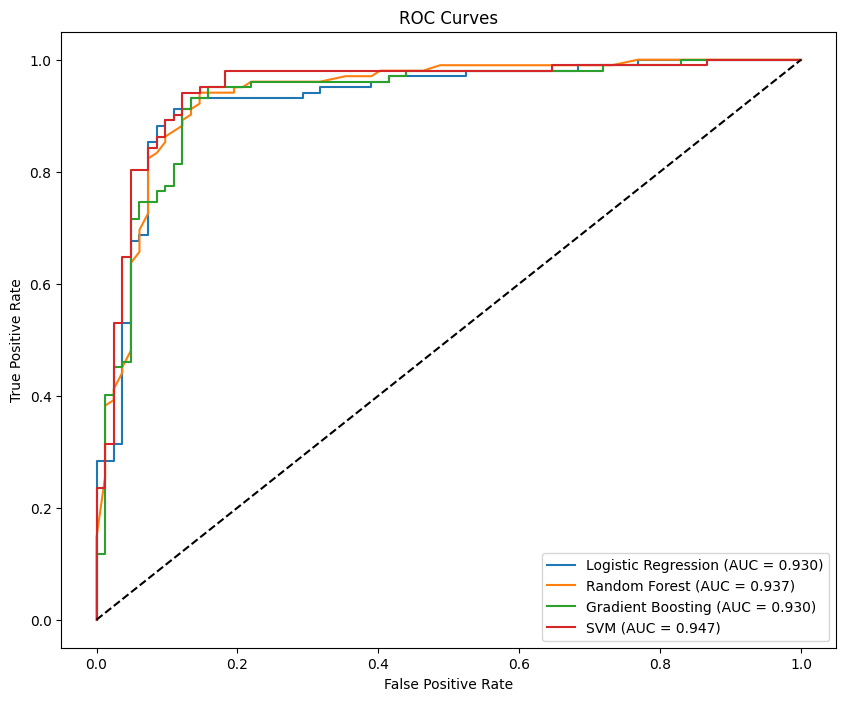

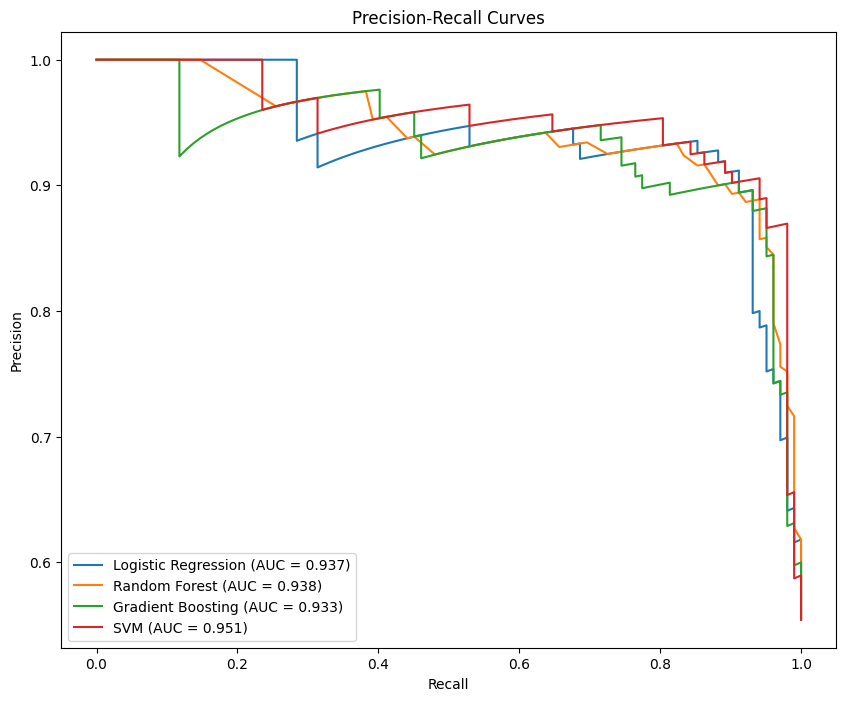


Best model: SVM


In [23]:
# Plot ROC curves
plt.figure(figsize=(10,8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10,8))
for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, result['y_proba'])
    plt.plot(recall, precision, label=f"{name} (AUC = {result['pr_auc']:.3f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

# Select best model based on PR AUC (often better for imbalanced datasets)
best_model_name = max(results, key=lambda x: results[x]['pr_auc'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")

In [ ]:
#Feature Importance Analysis

In [26]:
# Get feature names after preprocessing
preprocessor.fit(X_train)
feature_names = (numerical_features +
                 list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))

# Plot feature importance for tree-based models
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    importances = best_model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12,6))
    plt.title("Feature Importances")
    plt.bar(range(len(indices)), importances[indices], align="center")
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
#Risk Stratification

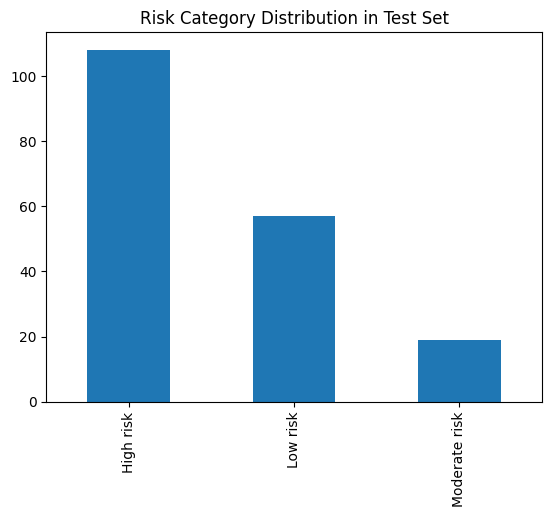

In [27]:
# Define risk categories based on predicted probabilities
def categorize_risk(probability):
    if probability < 0.2:
        return "Low risk"
    elif probability < 0.5:
        return "Moderate risk"
    else:
        return "High risk"

# Apply to test set
y_proba = best_model.predict_proba(X_test)[:,1]
risk_categories = [categorize_risk(p) for p in y_proba]

# Show distribution
pd.Series(risk_categories).value_counts().plot(kind='bar')
plt.title('Risk Category Distribution in Test Set')
plt.show()

In [ ]:
#Model Interpretation with SHAP


Explaining Logistic Regression...


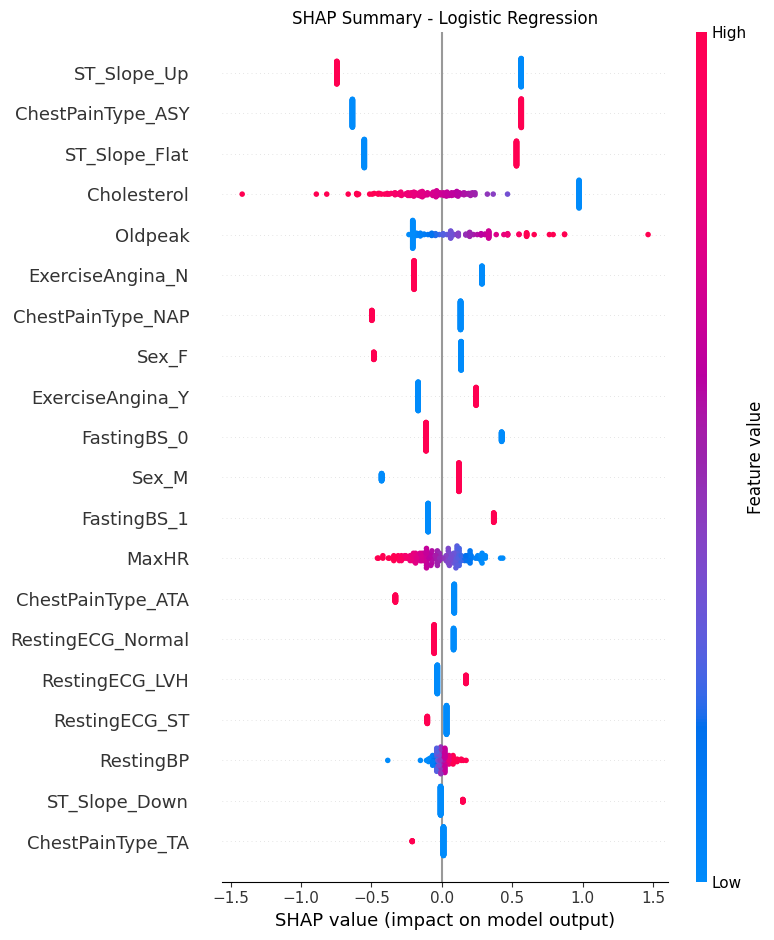


Explaining Random Forest...


  0%|          | 0/184 [00:00<?, ?it/s]

In [ ]:
import shap

def explain_model(model, X_train_processed, X_test_processed, model_name):
    """Generic model explanation function that handles different model types"""
    try:
        if model_name == "SVM":
            # Use KernelExplainer for SVM (slower but works)
            explainer = shap.KernelExplainer(model.predict_proba,
                                           shap.sample(X_train_processed, 100))
            shap_values = explainer.shap_values(X_test_processed)
        elif hasattr(model, 'predict_proba'):
            # Use TreeExplainer for tree-based models
            if 'tree' in str(type(model)).lower():
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X_test_processed)
            # Use LinearExplainer for linear models
            elif 'linear' in str(type(model)).lower():
                explainer = shap.LinearExplainer(model, X_train_processed)
                shap_values = explainer.shap_values(X_test_processed)
            # Default to KernelExplainer as fallback
            else:
                explainer = shap.KernelExplainer(model.predict_proba,
                                               shap.sample(X_train_processed, 100))
                shap_values = explainer.shap_values(X_test_processed)
        else:
            print(f"SHAP explanation not available for {model_name}")
            return

        # Plot summary (for classification, we use the values for class 1)
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # For binary classification

        plt.figure()
        shap.summary_plot(shap_values, X_test_processed,
                         feature_names=feature_names, show=False)
        plt.title(f"SHAP Summary - {model_name}")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not explain {model_name}: {str(e)}")

# Apply preprocessing to training data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after preprocessing
feature_names = (numerical_features +
                list(preprocessor.named_transformers_['cat'].named_steps['onehot']
                    .get_feature_names_out(categorical_features)))

# Explain each model
for name, result in results.items():
    model = result['model'].named_steps['classifier']
    print(f"\nExplaining {name}...")
    explain_model(model, X_train_processed, X_test_processed, name)

In [ ]:
#Final Model Deployment

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Sample data
X_train = [[1, 2], [3, 4], [5, 6]]
y_train = [0, 1, 0]

# Fit the pipeline FIRST
pipe.fit(X_train, y_train)

# Now you can predict
pipe.predict([[2, 3]])  # This will work

array([0])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming column 0 is categorical
pipe = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),  # Encodes strings
    ('model', RandomForestClassifier())
])

pipe.fit(X_train, y_train)  # Now works even with 'M', 'F'

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('model', RandomForestClassifier())])

In [19]:
import joblib
import pandas as pd
import numpy as np
import shap
from sklearn.pipeline import Pipeline

# Load your preprocessor and best model (assuming it's a pipeline)
# best_model = joblib.load('heart_disease_risk_predictor.pkl')

def predict_heart_disease_risk(age, sex, chest_pain_type, resting_bp, cholesterol,
                             fasting_bs, resting_ecg, max_hr, exercise_angina,
                             oldpeak, st_slope, model):
    """
    Predicts heart disease risk based on input features.

    Args:
        - All the input features for prediction
        - model: Trained scikit-learn pipeline with classifier

    Returns:
        Dictionary containing:
        - probability: Probability of heart disease (0-1)
        - risk_category: (Low/Moderate/High)
        - contributing_factors: Dictionary of key contributing factors
    """
    # Create input DataFrame
    input_data = pd.DataFrame({
        'Age': [age],
        'Sex': [sex],
        'ChestPainType': [chest_pain_type],
        'RestingBP': [resting_bp],
        'Cholesterol': [cholesterol],
        'FastingBS': [fasting_bs],
        'RestingECG': [resting_ecg],
        'MaxHR': [max_hr],
        'ExerciseAngina': [exercise_angina],
        'Oldpeak': [oldpeak],
        'ST_Slope': [st_slope]
    })

    # Get probability (handle both pipeline and standalone classifier)
    if isinstance(model, Pipeline):
        probability = model.predict_proba(input_data)[0, 1]
        processed_input = model.named_steps['preprocessor'].transform(input_data)
        classifier = model.named_steps['classifier']
    else:
        probability = model.predict_proba(input_data)[0, 1]
        processed_input = input_data.values  # Assuming already preprocessed
        classifier = model

    # Get risk category (you need to implement this function)
    risk_category = categorize_risk(probability)

    # Get SHAP values for explanation
    try:
        # Create SHAP explainer
        explainer = shap.KernelExplainer(classifier.predict_proba,
                                       processed_input[:100])  # Use small sample for background

        # Calculate SHAP values
        shap_values = explainer.shap_values(processed_input)

        # Get feature names (adjust based on your preprocessor)
        if isinstance(model, Pipeline):
            feature_names = get_feature_names_from_preprocessor(model.named_steps['preprocessor'])
        else:
            feature_names = input_data.columns.tolist()

        # Get top contributing factors
        contribs = {feature_names[i]: float(shap_values[1][0][i])
                   for i in np.argsort(np.abs(shap_values[1][0]))[::-1][:3]}
    except Exception as e:
        contribs = {"Note": f"Model explanation failed: {str(e)}"}

    return {
        'probability': float(probability),
        'risk_category': risk_category,
        'contributing_factors': contribs
    }

# Helper functions you need to implement
def categorize_risk(probability):
    """Converts probability to risk category"""
    if probability < 0.3:
        return "Low"
    elif probability < 0.7:
        return "Moderate"
    else:
        return "High"

def get_feature_names_from_preprocessor(preprocessor):
    """Extracts feature names from preprocessor"""
    # This needs to match how your preprocessor is structured
    # Example for ColumnTransformer:
    return preprocessor.get_feature_names_out()

# Example usage
if __name__ == "__main__":
    # Load your model (example)
    # best_model = joblib.load('heart_disease_risk_predictor.pkl')

    # Mock model for demonstration
    from sklearn.svm import SVC
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler

    best_model = make_pipeline(
        StandardScaler(),
        SVC(class_weight='balanced', probability=True, random_state=42)
    )

    example_prediction = predict_heart_disease_risk(
        age=45, sex='M', chest_pain_type='ATA', resting_bp=140,
        cholesterol=250, fasting_bs=0, resting_ecg='Normal',
        max_hr=150, exercise_angina='N', oldpeak=1.5, st_slope='Flat',
        model=best_model
    )
    print(example_prediction)

NotFittedError: Pipeline is not fitted yet.